In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here

df=pd.read_csv("train.csv")
df.head()

# Code ends here

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,"$4,701",No,$0,Yes,...,1,Sports Car,no,$0,0,No,4,$0,9.0,1
1,2533,738075150,0,50.0,0,7.0,"$10,232",No,"$129,979",Yes,...,16,Minivan,no,"$5,458",2,No,3,$0,18.0,0
2,9169,176935775,0,40.0,2,17.0,"$66,200",Yes,"$223,960",z_No,...,13,z_SUV,no,$0,0,No,1,$629,9.0,1
3,4174,195054268,2,38.0,2,13.0,"$34,056",No,"$122,908",Yes,...,4,Sports Car,no,$502,1,No,5,$0,2.0,0
4,10150,764551255,0,38.0,0,NaN,"$45,734",No,"$222,653",Yes,...,1,Pickup,no,"$3,296",1,No,3,"$2,156",2.0,1


In [3]:
df.CLAIM_FLAG.value_counts()/len(df)

0    0.656959
1    0.343041
Name: CLAIM_FLAG, dtype: float64

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG'],
      dtype='object')

In [5]:
for col in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']:
    df[col]  = df[col].str.replace('$','')
    df[col]  = df[col].str.replace(',','')

In [6]:
df[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]=df[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']].astype(float)

In [7]:
df.head()

,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.0,3,9.0,4701.0,No,0.0,Yes,...,1,Sports Car,no,0.0,0,No,4,0.0,9.0,1
1,2533,738075150,0,50.0,0,7.0,10232.0,No,129979.0,Yes,...,16,Minivan,no,5458.0,2,No,3,0.0,18.0,0
2,9169,176935775,0,40.0,2,17.0,66200.0,Yes,223960.0,z_No,...,13,z_SUV,no,0.0,0,No,1,629.0,9.0,1
3,4174,195054268,2,38.0,2,13.0,34056.0,No,122908.0,Yes,...,4,Sports Car,no,502.0,1,No,5,0.0,2.0,0
4,10150,764551255,0,38.0,0,NaN,45734.0,No,222653.0,Yes,...,1,Pickup,no,3296.0,1,No,3,2156.0,2.0,1


In [8]:
df.drop(["Unnamed: 0","ID","YOJ"],axis=1,inplace=True)

In [9]:
df.shape

(8241, 23)

In [10]:
df.isnull().sum()

KIDSDRIV        0
AGE             6
HOMEKIDS        0
INCOME        462
PARENT1         0
HOME_VAL      458
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    530
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       515
CLAIM_FLAG      0
dtype: int64

In [11]:
df["OCCUPATION"]= df.groupby('EDUCATION')['OCCUPATION'].transform(lambda x: x.fillna(x.mode()[0]))
df[df["OCCUPATION"].isnull()]

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG


In [12]:
for col in ['AGE','CAR_AGE','INCOME','HOME_VAL']:
    df[col].fillna(df[col].mean(), inplace=True)

In [13]:
df.isnull().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
dtype: int64

In [14]:
df.shape

(8241, 23)

In [15]:
df.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
dtype: object

In [16]:
#columns=["PARENT1","MSTATUS","GENDER","EDUCATION","OCCUPATION","CAR_USE","CAR_TYPE","RED_CAR","REVOKED"]
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i].astype(str))

In [17]:
df.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
INCOME        float64
PARENT1         int32
HOME_VAL      float64
MSTATUS         int32
GENDER          int32
EDUCATION       int32
OCCUPATION      int32
TRAVTIME        int64
CAR_USE         int32
BLUEBOOK      float64
TIF             int64
CAR_TYPE        int32
RED_CAR         int32
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED         int32
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
dtype: object

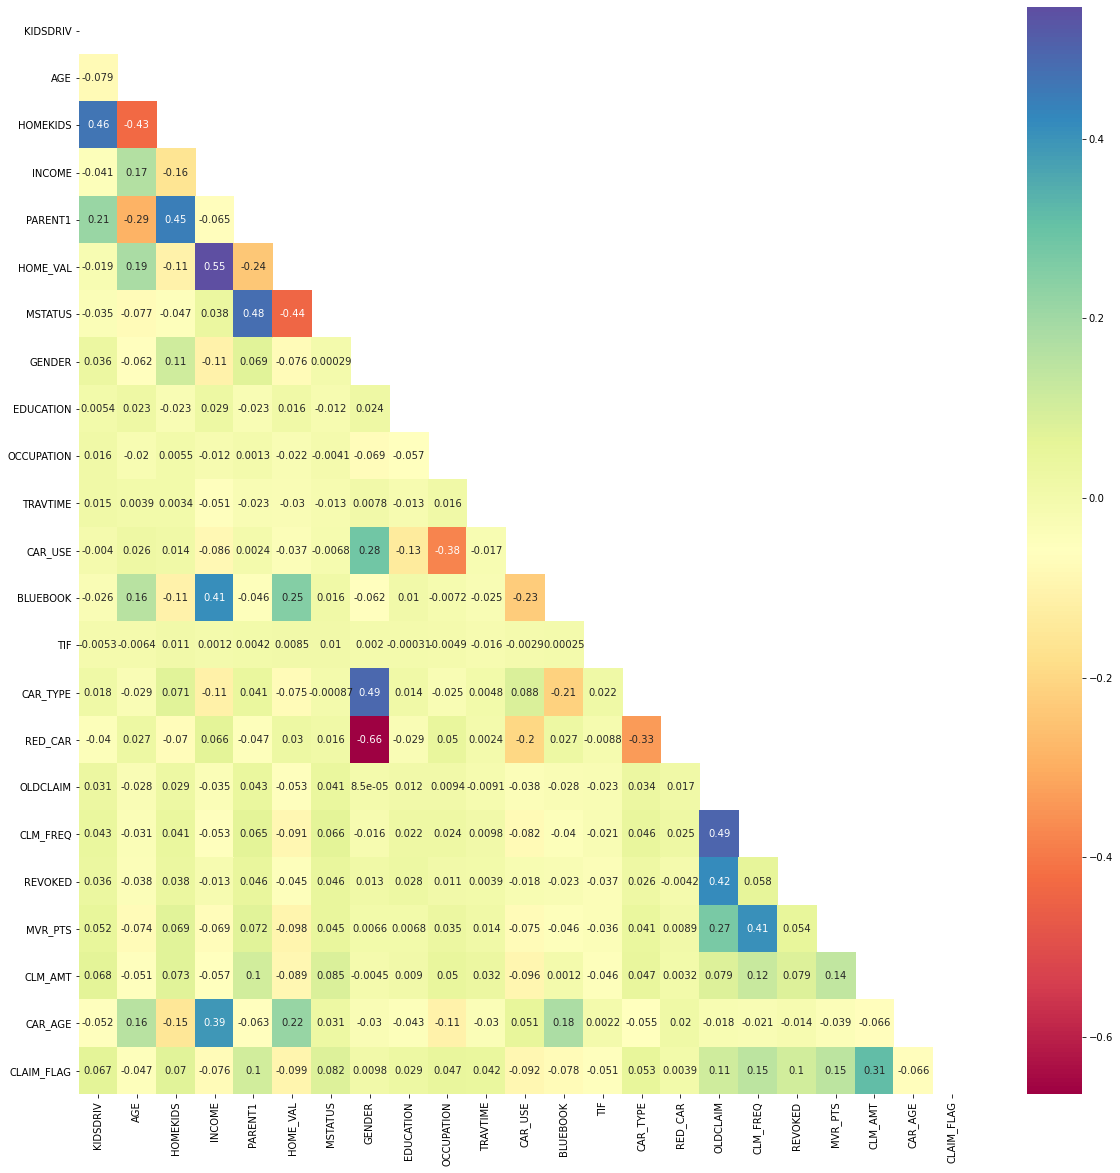

In [18]:
plt.figure(figsize=(20,20))
mask=np.triu(np.ones(df.corr().shape)).astype(np.bool)
sns.heatmap(df.corr(),cmap="Spectral",annot=True,mask=mask)

plt.show()


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [19]:
# Code starts here

y=df['CLAIM_FLAG']

X=df.drop("CLAIM_FLAG",axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

# Code ends here.

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

#### Without SMOTE

In [20]:
# Code Starts here
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

accuracy_lr=lr.score(X_test,y_test)
print("Accuracy:",accuracy_lr)       

#Finding the recall score
recall_lr=recall_score(y_test, y_pred)
print ("recall:",recall_lr)

#Finding the precision score
precision_lr=precision_score(y_test, y_pred)
print ("precision:",precision_lr)

#Finding the f1 score
f1_lr=f1_score(y_test, y_pred)
print ("f1_score:", f1_lr)

#Finding the confusion matrix
confusion_mat_lr=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_lr)

# Code ends here

Accuracy: 0.7868985038414881
recall: 0.49410377358490565
precision: 0.8104448742746615
f1_score: 0.6139194139194138
Confusion Matrix:
 [[1527   98]
 [ 429  419]]


#### With SMOTE

Accuracy: 0.8212697128993126
recall: 0.6084905660377359
precision: 0.8242811501597445
f1_score: 0.7001356852103121
Confusion Matrix:
 [[1515  110]
 [ 332  516]]


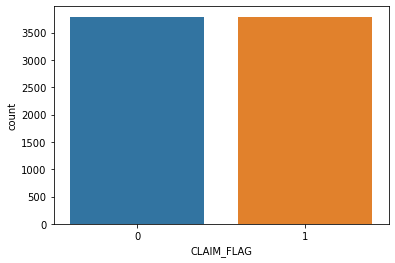

In [21]:
smote = SMOTE(random_state=0)

#Sampling the data using SMOTE
X_sample, y_sample = smote.fit_sample(X_train, y_train)
sns.countplot(y_sample)

#Initialising Logistic Regression model
model_smote = LogisticRegression(random_state=0)

#Fitting the model on train data
model_smote.fit(X_sample, y_sample)

#Making predictions on test data
y_pred=model_smote.predict(X_test)

#Finding the accuracy score 
accuracy_smote=model_smote.score(X_test,y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(y_test, y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(y_test, y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(y_test, y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
confusion_mat_smote=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_smote)


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [27]:
# Code Starts here
test=pd.read_csv("test.csv")
empty=test["Unnamed: 0"]
for col in ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']:
    test[col]  = test[col].str.replace('$','')
    test[col]  = test[col].str.replace(',','')
test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]=test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']].astype(float)
test.drop(["Unnamed: 0","ID","YOJ"],axis=1,inplace=True)
test["OCCUPATION"]= test.groupby('EDUCATION')['OCCUPATION'].transform(lambda x: x.fillna(x.mode()[0]))
for col in ['AGE','CAR_AGE','INCOME','HOME_VAL']:
    test[col].fillna(test[col].mean(), inplace=True)
le=LabelEncoder()
for i in test.columns:
    if test[i].dtype == 'object':
        test[i]=le.fit_transform(test[i].astype(str))
# Code ends here

In [28]:
test.head()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,0,36.0,2,58833.0,0,193644.0,0,0,1,7,...,17680.0,1,4,1,0.0,0,1,2,4611.0,11.0
1,0,47.0,0,35259.0,0,0.0,1,0,2,3,...,12850.0,4,0,0,1304.0,1,0,5,0.0,14.0
2,0,48.0,0,126442.0,0,0.0,1,0,2,3,...,7820.0,7,2,1,0.0,0,0,0,0.0,12.0
3,0,46.0,0,71192.0,0,263204.0,0,1,2,3,...,6360.0,1,5,0,0.0,0,0,0,0.0,18.0
4,0,46.0,0,67381.0,0,226928.0,0,1,2,3,...,27630.0,4,2,0,6149.0,3,0,4,0.0,9.0


In [29]:
pred=model_smote.predict(test)
sample_submission=pd.DataFrame({"":empty,"CLAIM_FLAG":pred})
#sample_submission.to_csv("submission_1.csv",index=False)
sample_submission

,,CLAIM_FLAG
0,635,1
1,4189,0
2,5062,0
3,8325,0
4,9281,0
...,...,...
2056,3139,1
2057,7281,0
2058,3164,0
2059,2915,0
